In [19]:
import os
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [20]:
img_dir = "./ScreenShots"
txt_dir = "./Annotations"

In [21]:
print ("ScreenShots : ", len(glob.glob(img_dir + "/*")))
print ("Annotations : ", len(glob.glob(txt_dir + "/*")))
assert len(glob.glob(img_dir + "/*")) != 0, "Cannot find ScreenShots"
assert len(glob.glob(txt_dir + "/*")) != 0, "Cannot find Annotations"
assert len(glob.glob(img_dir + "/*")) == len(glob.glob(txt_dir + "/*")), "Unmatch files num between img and txt"

ScreenShots :  26948
Annotations :  26948


In [22]:
skeleton_list = ["head", "eye.R", "eye.L", "ear.R", "ear.L", "neck02", "upperarm01.R", "upperarm01.L", 
        "lowerarm01.R", "lowerarm01.L", "wrist.R", "wrist.L",  "upperleg01.R", "upperleg01.L", "lowerleg01.R", "lowerleg01.L", "foot.R", "foot.L"]

In [23]:
skeleton_num = len(skeleton_list)
print ("Skeleton Num:", skeleton_num)
assert skeleton_num != 0, "No skeleton to annotate"

Skeleton Num: 18


In [35]:
def drawSkeleton(img, point, color):
    return cv2.circle(img, (point[0], int(img.shape[1]*3/4)-point[1]), 2, (0,0,255), -1)

./ScreenShots/screenshot_000001.png
./ScreenShots/screenshot_000002.png
./ScreenShots/screenshot_000003.png
./ScreenShots/screenshot_000004.png
./ScreenShots/screenshot_000005.png
./ScreenShots/screenshot_000006.png
./ScreenShots/screenshot_000007.png
./ScreenShots/screenshot_000008.png
./ScreenShots/screenshot_000009.png
./ScreenShots/screenshot_000010.png
./ScreenShots/screenshot_000011.png
./ScreenShots/screenshot_000012.png
./ScreenShots/screenshot_000013.png
./ScreenShots/screenshot_000014.png
./ScreenShots/screenshot_000015.png
./ScreenShots/screenshot_000016.png
./ScreenShots/screenshot_000017.png
./ScreenShots/screenshot_000018.png
./ScreenShots/screenshot_000019.png
./ScreenShots/screenshot_000020.png


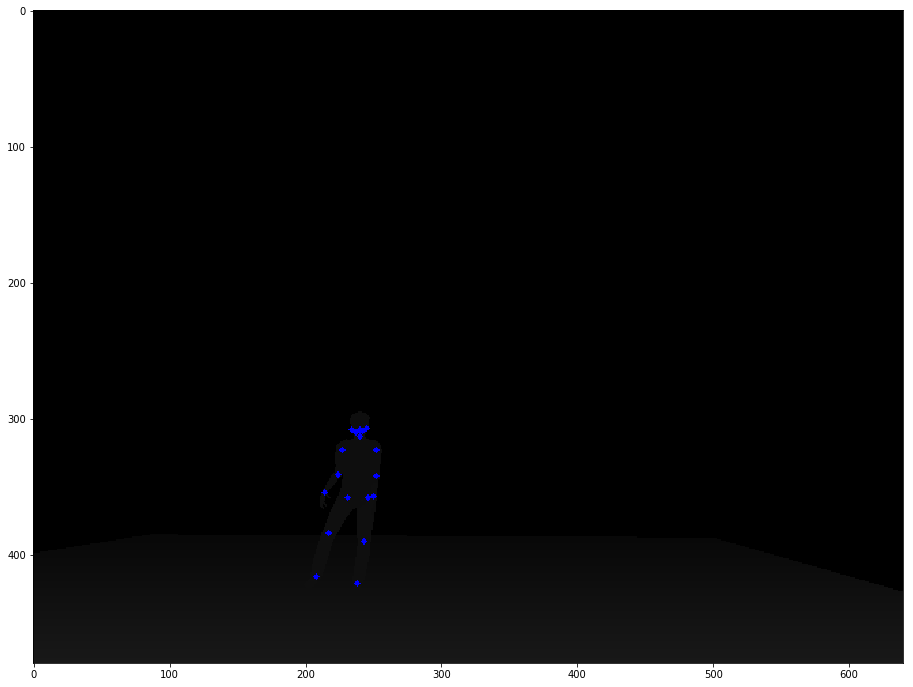

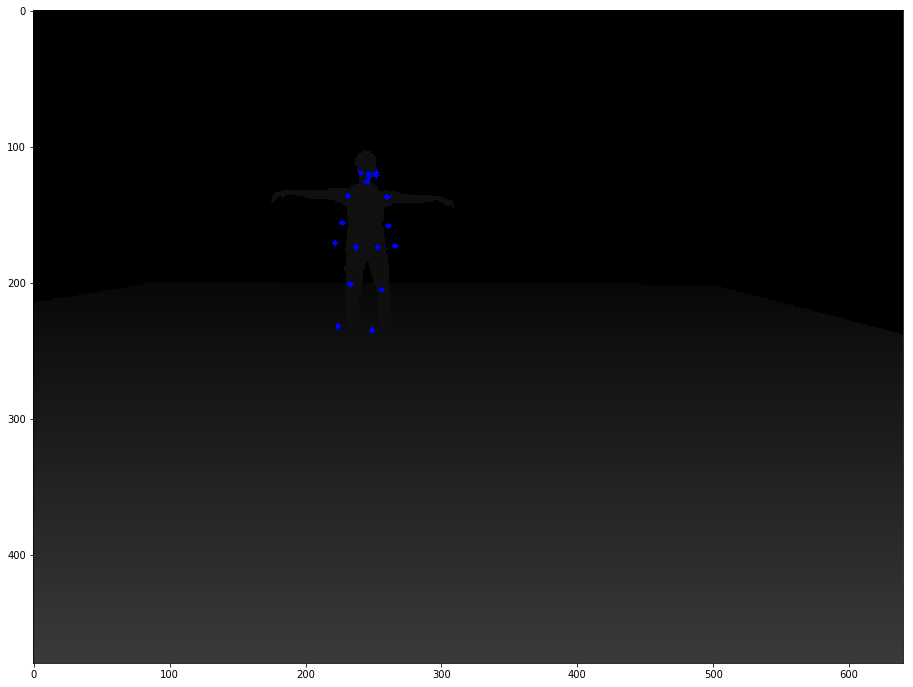

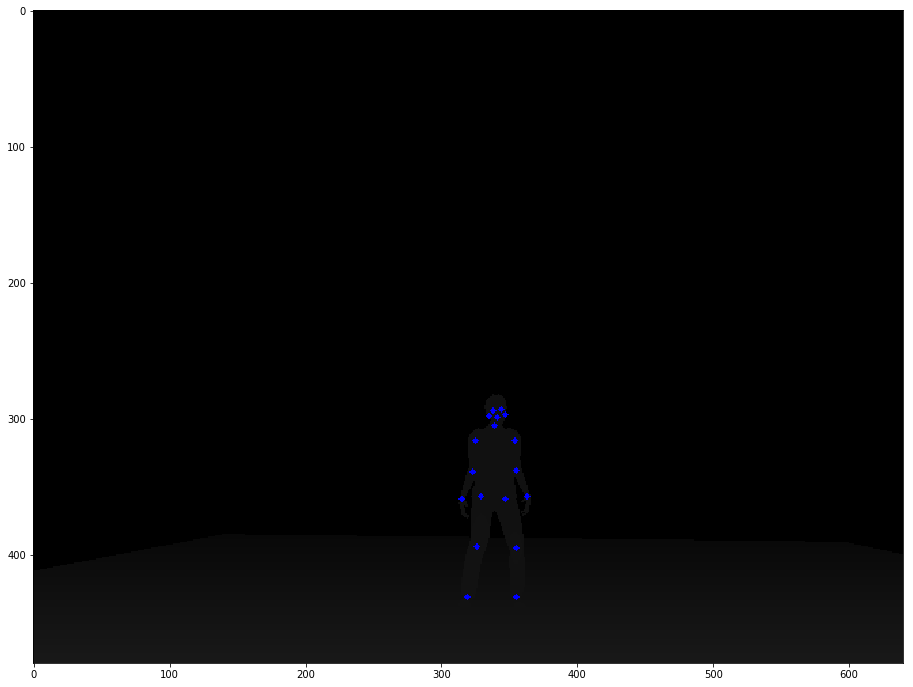

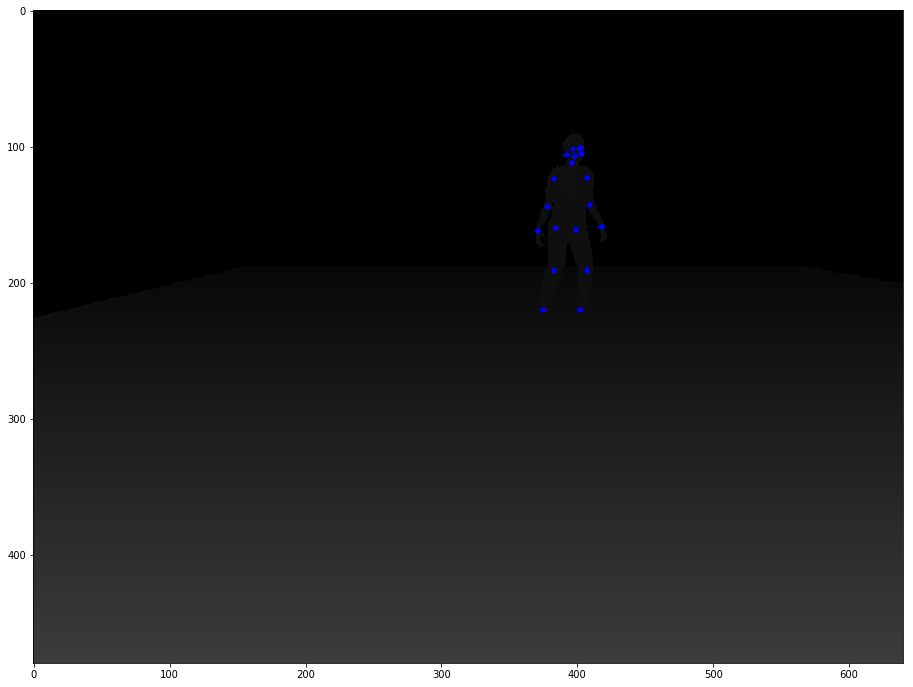

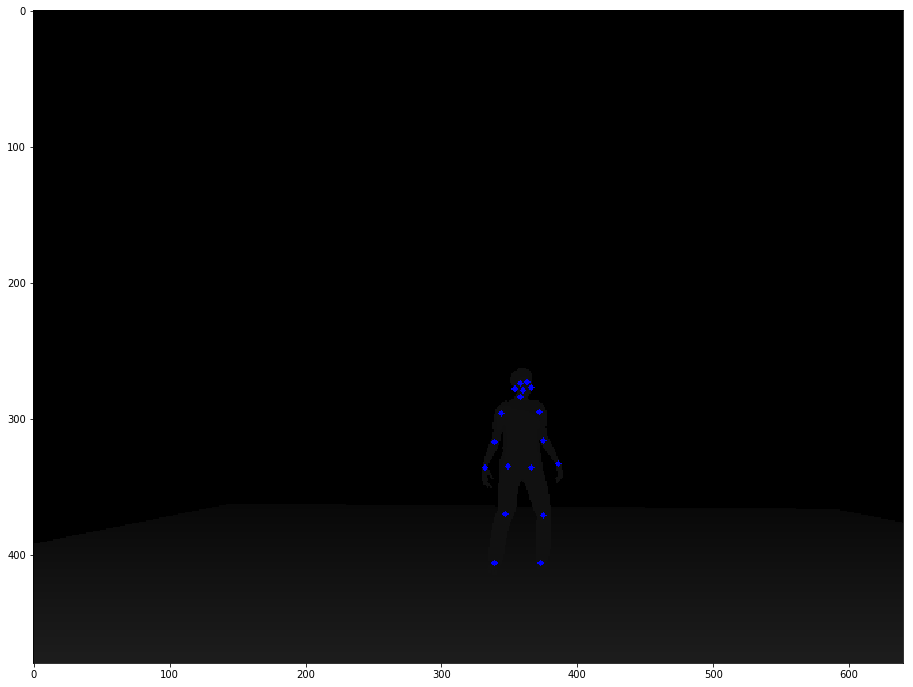

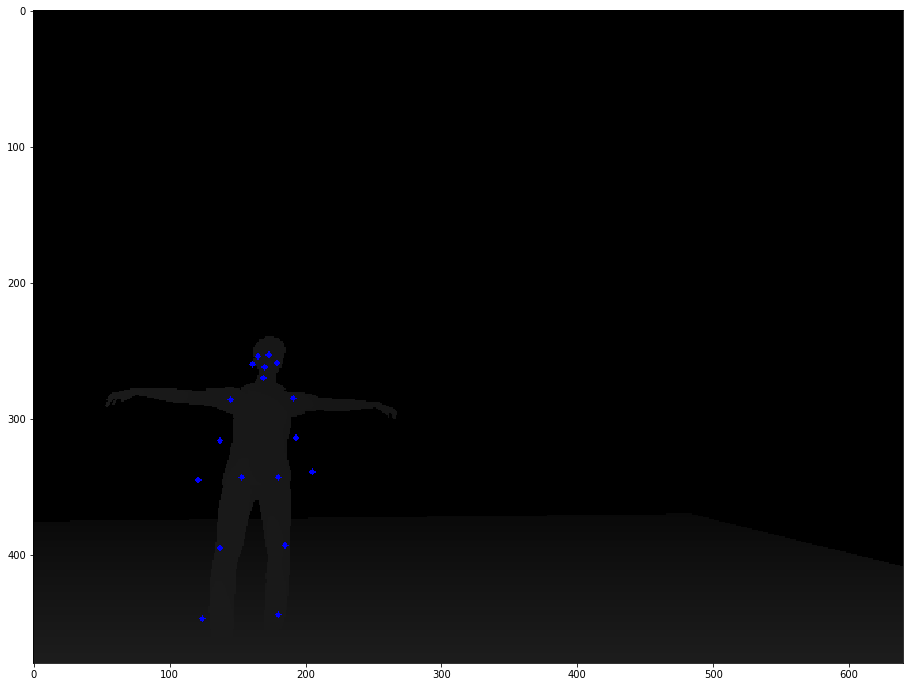

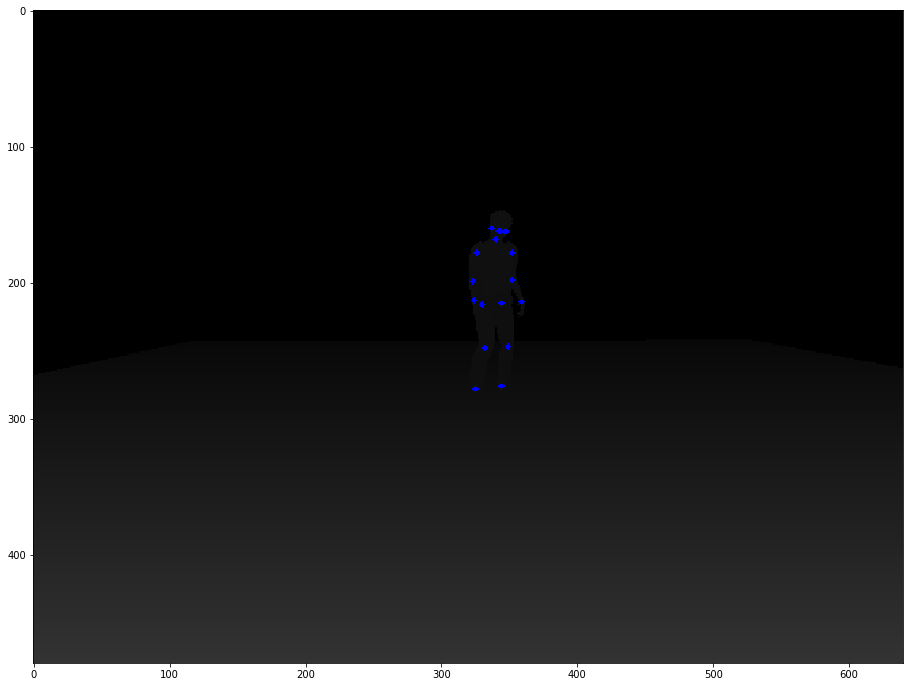

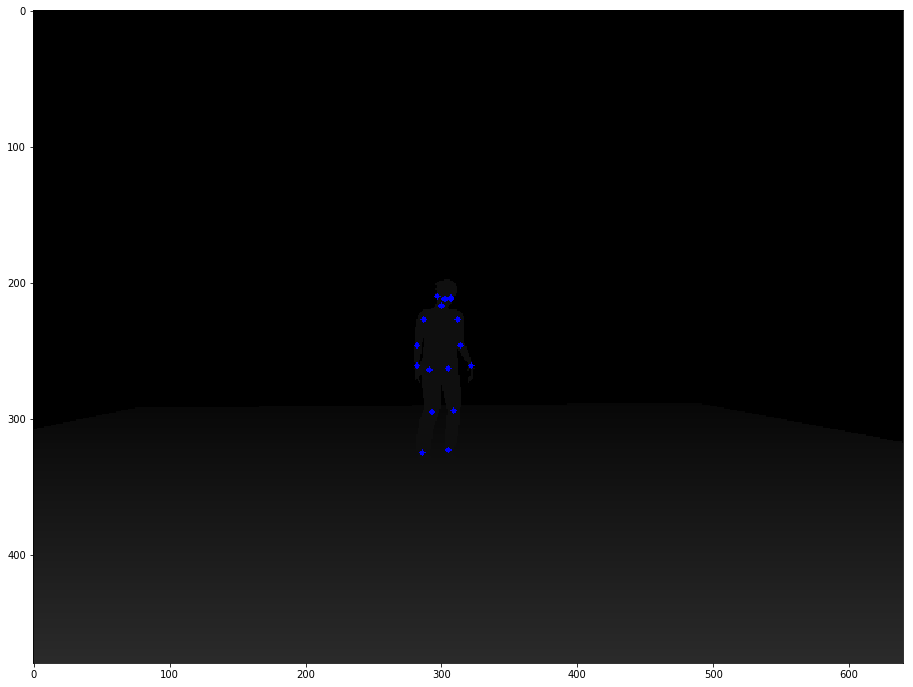

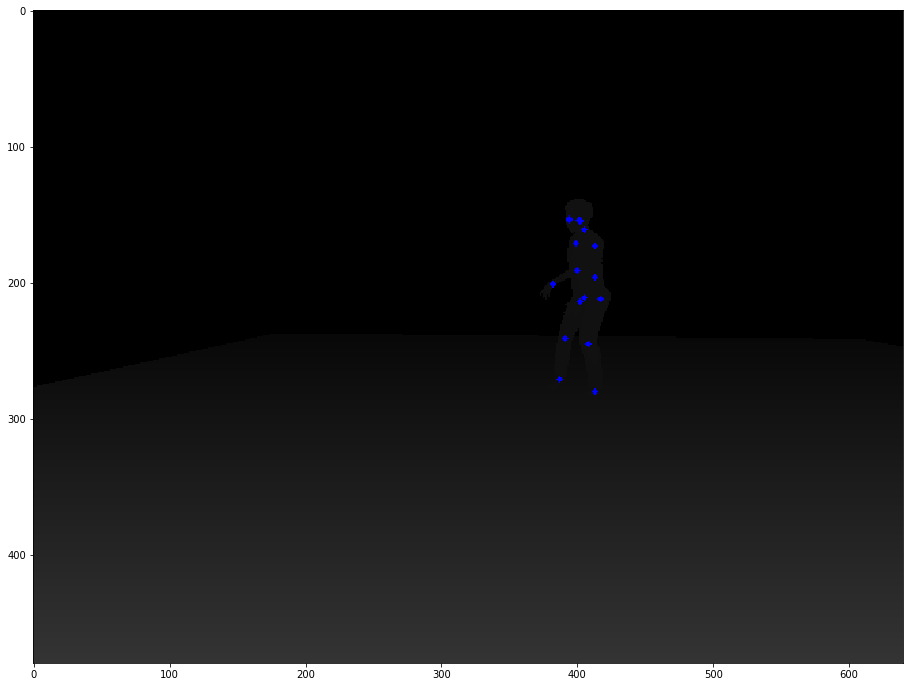

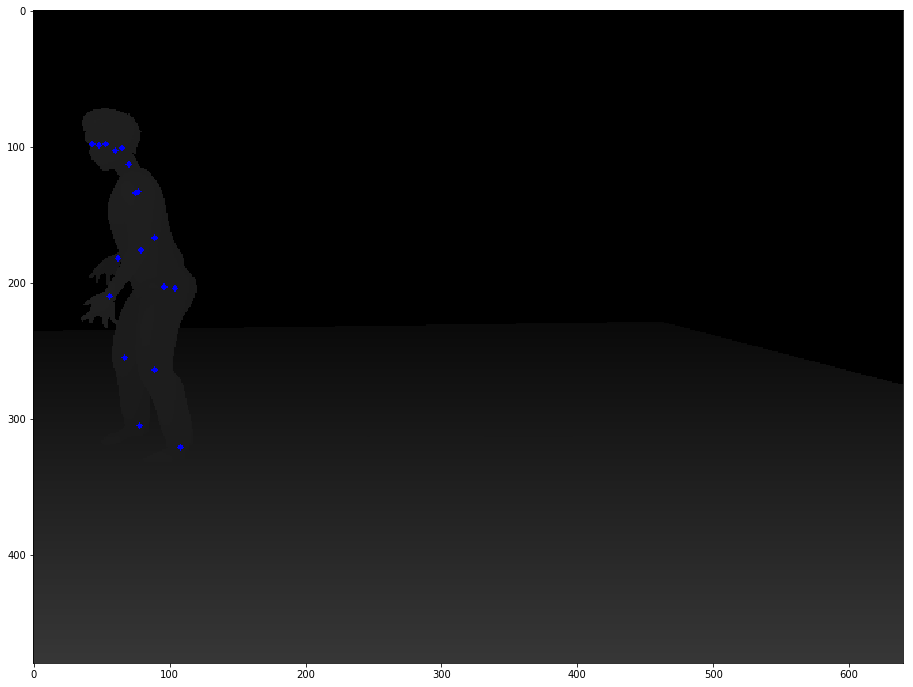

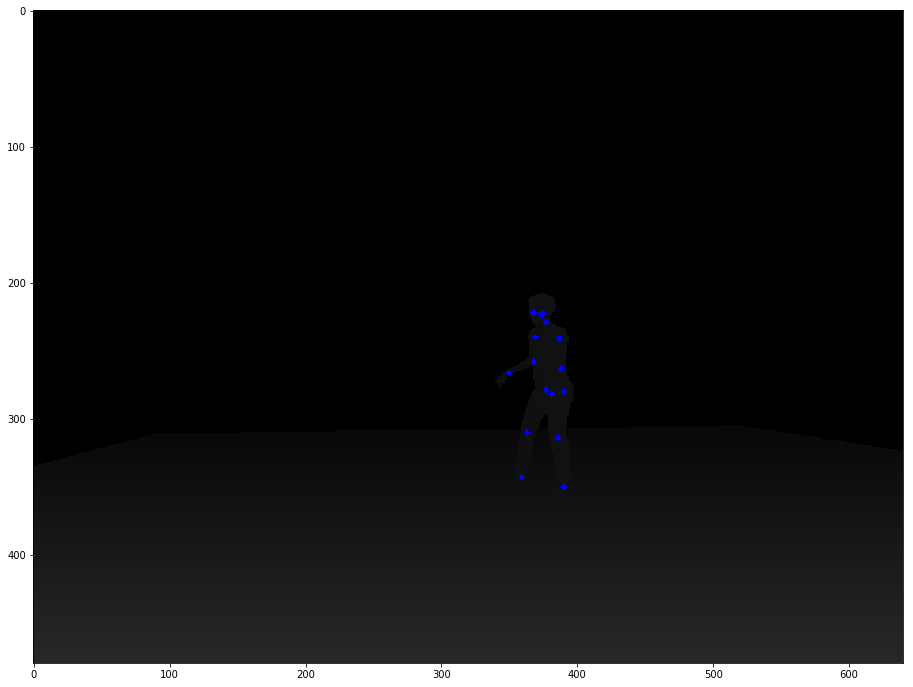

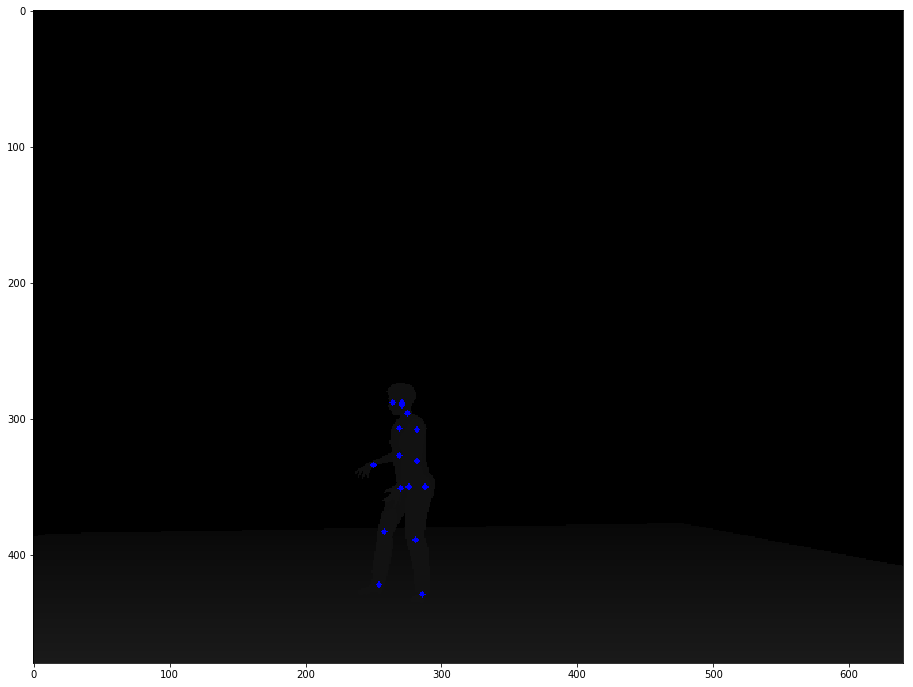

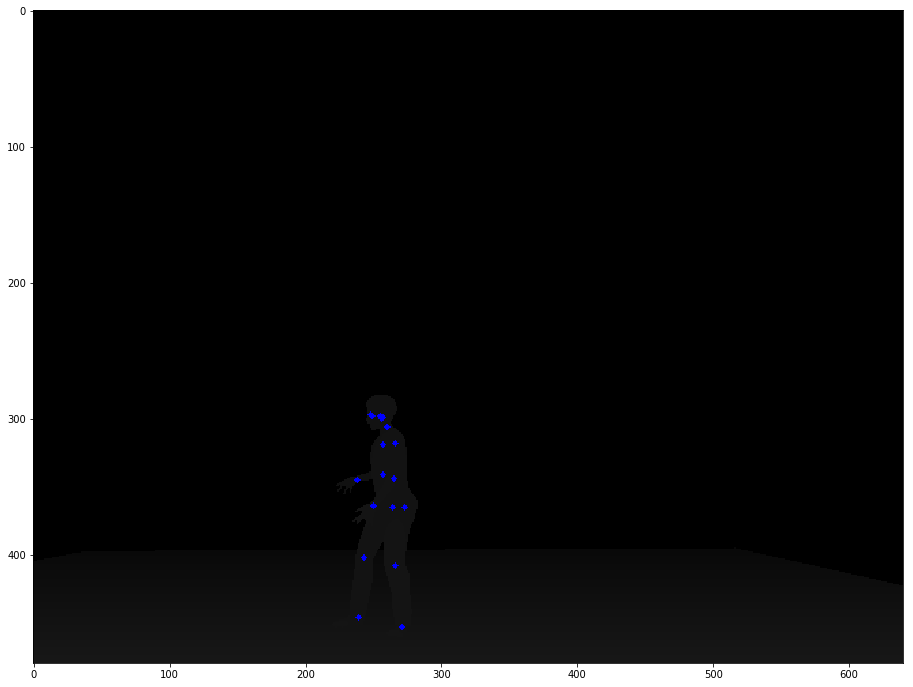

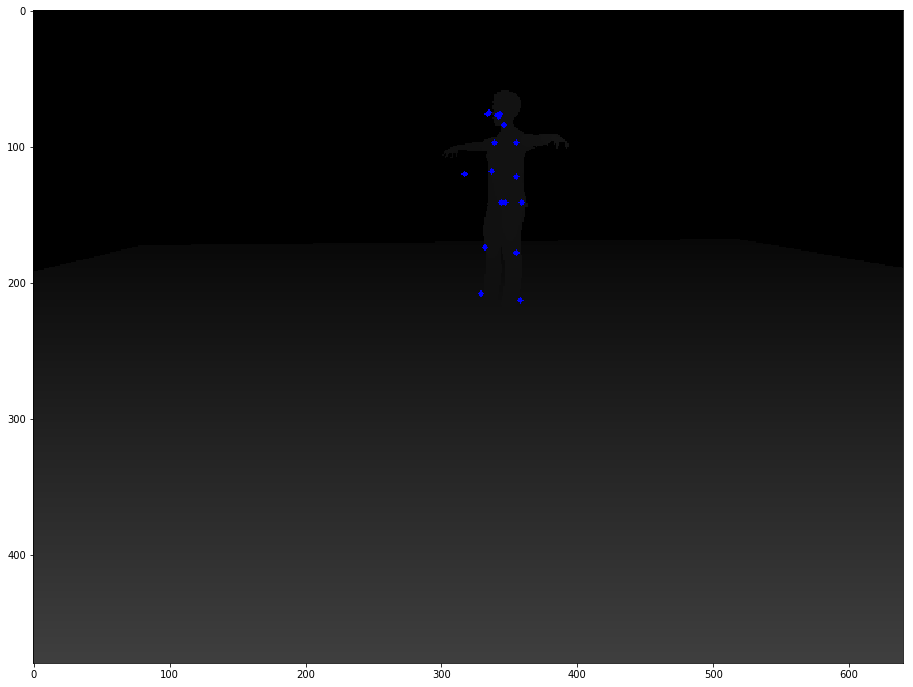

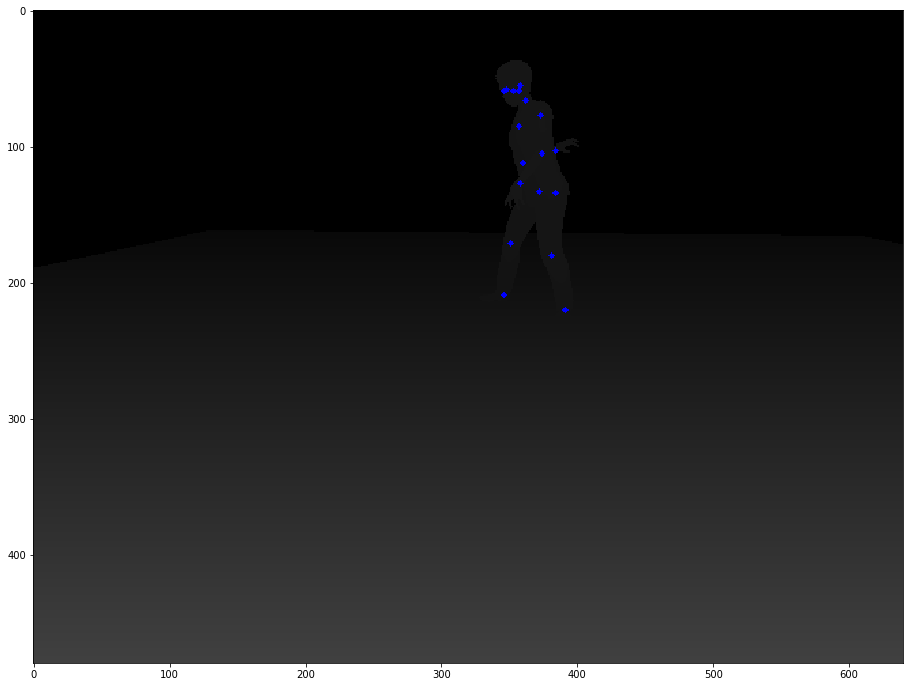

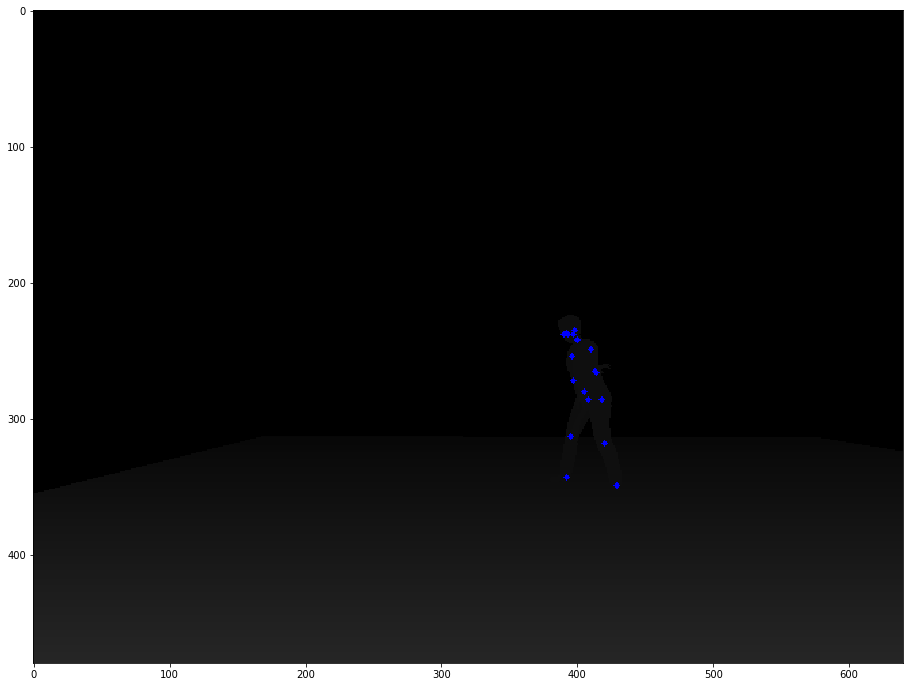

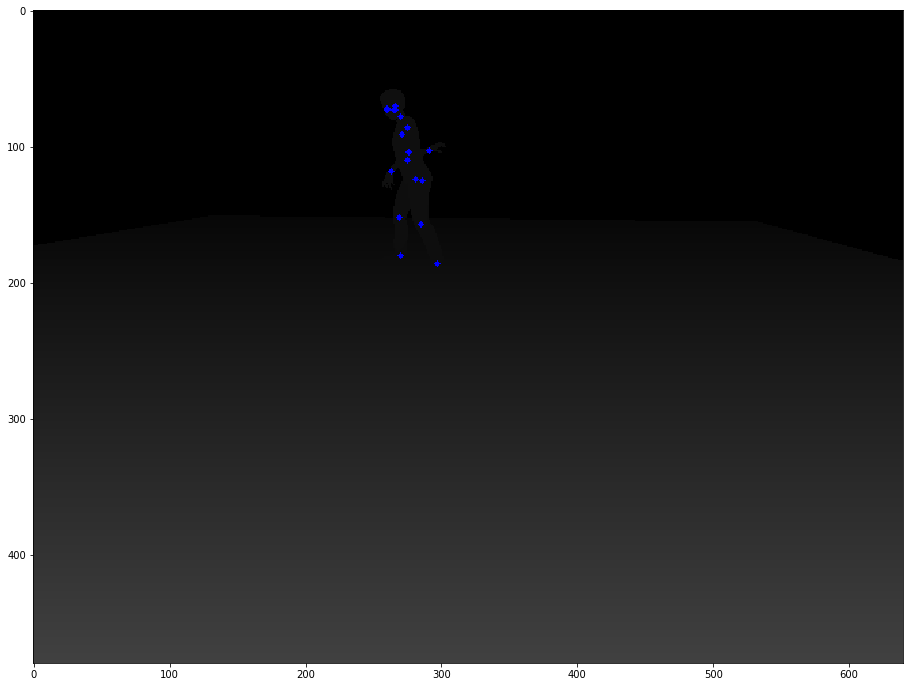

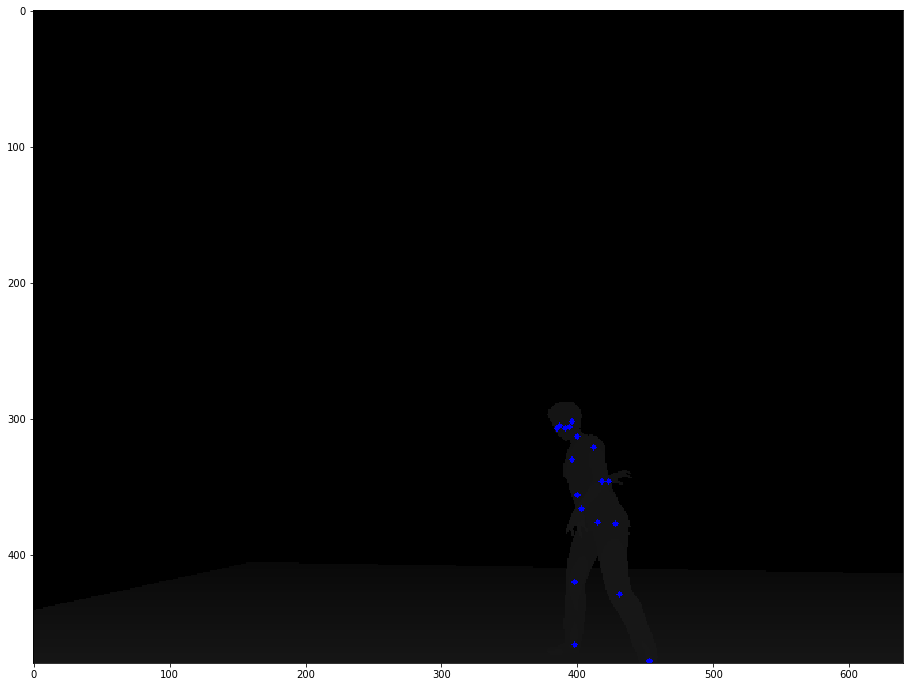

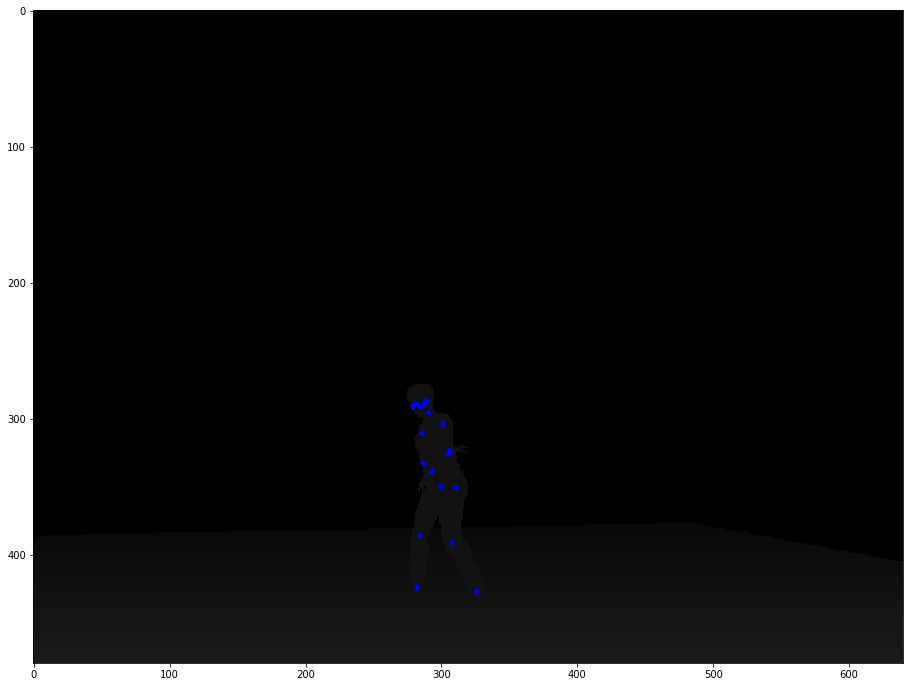

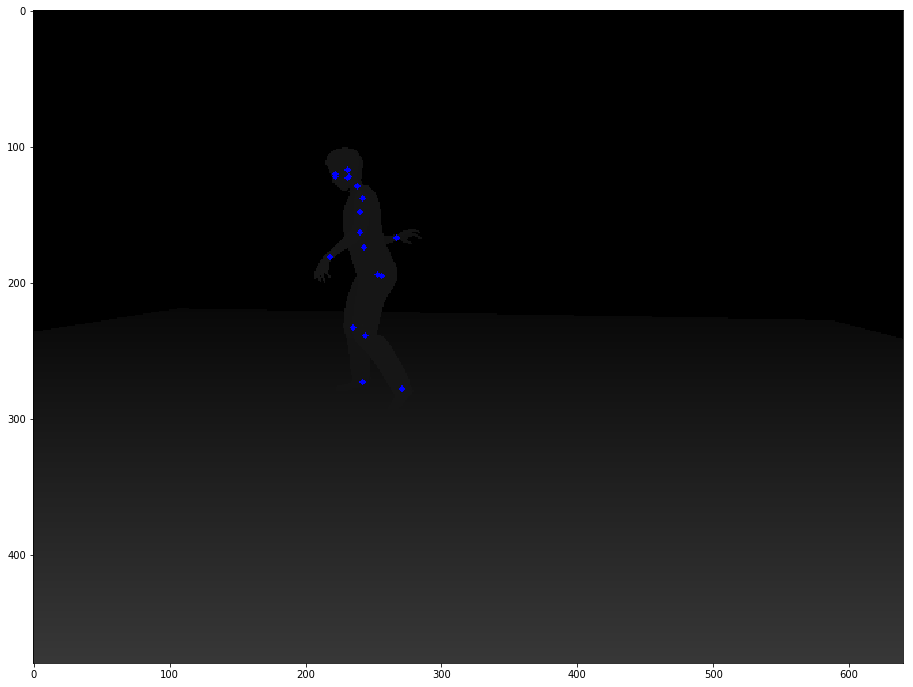

In [64]:
idx = 1
for img_name in sorted(glob.glob(img_dir + "/*")):
    if idx > 20:
        break
    # import img
    #print (img_name)
    target_img = cv2.imread(img_name, cv2.COLOR_BGR2RGB)
    assert target_img.shape != 0, "Cannot Open"+img_name
    
    # import txt
    txt_name = "./Annotations/annotation_" + str(idx).zfill(6) + ".txt"
    with open(txt_name) as f:
        txt_data = f.read().split(",")
    
    # draw Skeleton
    for i in range(0, skeleton_num*2, 2):
        target_pos = np.asarray([txt_data[i], txt_data[i+1]], dtype=int)
        target_img = drawSkeleton(target_img, target_pos, "red")
    
    # show result
    print (img_name)
    plt.figure(figsize=(16, 12))
    plt.imshow(target_img)
    idx += 1